In [1]:
import xarray as xr

Data source: https://figshare.com/ndownloader/files/43053616

In [2]:
# Load data.
stm_points = xr.open_zarr('../../stm.zarr')
stm_points

<xarray.Dataset> Size: 14MB
Dimensions:    (space: 78582, time: 10)
Coordinates:
    azimuth    (space) int64 629kB dask.array<chunksize=(1000,), meta=np.ndarray>
    lat        (space) float32 314kB dask.array<chunksize=(1000,), meta=np.ndarray>
    lon        (space) float32 314kB dask.array<chunksize=(1000,), meta=np.ndarray>
    range      (space) int64 629kB dask.array<chunksize=(1000,), meta=np.ndarray>
  * time       (time) int64 80B 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: space
Data variables:
    amplitude  (space, time) float32 3MB dask.array<chunksize=(1000, 10), meta=np.ndarray>
    complex    (space, time) complex64 6MB dask.array<chunksize=(1000, 10), meta=np.ndarray>
    phase      (space, time) float32 3MB dask.array<chunksize=(1000, 10), meta=np.ndarray>
Attributes:
    multi-look:  coarsen-mean

In [3]:
print(stm_points.coords)

Coordinates:
    azimuth  (space) int64 629kB dask.array<chunksize=(1000,), meta=np.ndarray>
    lat      (space) float32 314kB dask.array<chunksize=(1000,), meta=np.ndarray>
    lon      (space) float32 314kB dask.array<chunksize=(1000,), meta=np.ndarray>
    range    (space) int64 629kB dask.array<chunksize=(1000,), meta=np.ndarray>
  * time     (time) int64 80B 0 1 2 3 4 5 6 7 8 9


In [4]:
stm_points_sparse = stm_points.isel(space=slice(0, 78000, 500))

In [5]:
from matplotlib import pyplot as plt

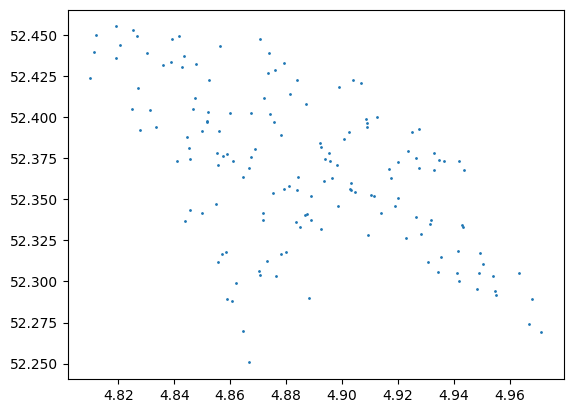

In [6]:
plt.scatter(stm_points_sparse['lon'].values, stm_points_sparse['lat'].values, s=1)

In [7]:
import numpy as np

from pydepsi.network import generate_arcs

In [8]:
# Generate a Delaunay network with long edges removed.
coordinates, arcs_delaunay = generate_arcs(stm_points_sparse, method='delaunay', max_length=0.05)
print(len(coordinates))
print(len(arcs_delaunay))

156
442


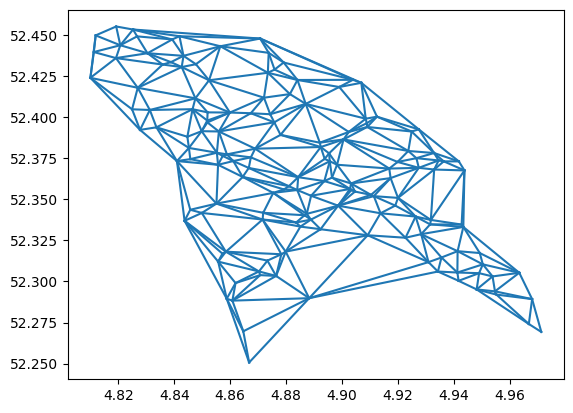

In [9]:
# Visualize results.
xx = np.hstack([coordinates[list(p),0] for p in arcs_delaunay])
yy = np.hstack([coordinates[list(p),1] for p in arcs_delaunay])

for i in range(0, len(xx), 2):
    plt.plot(xx[i:i+2], yy[i:i+2], 'tab:blue')

In [10]:
# Generate a 'redundant' network with long edges removed.
# A redundant network allows max_links arcs per node and tries to spread these evenly over num_groups direction groups.
coordinates, arcs_redundant = generate_arcs(stm_points_sparse, method='redundant', max_length=0.05, max_links = 8, num_groups = 4)
print(len(coordinates))
print(len(arcs_redundant))

156
797


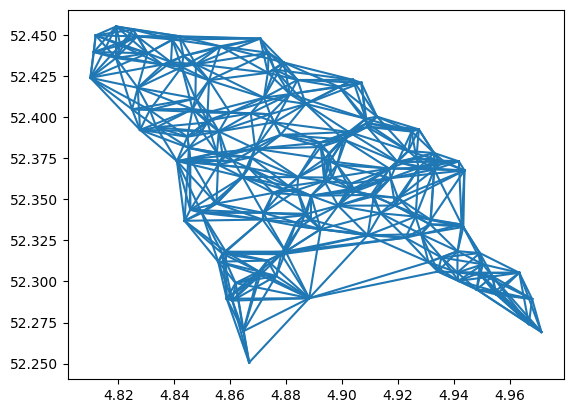

In [11]:
# Visualize results.
xx = np.hstack([coordinates[list(p),0] for p in arcs_redundant])
yy = np.hstack([coordinates[list(p),1] for p in arcs_redundant])

for i in range(0, len(xx), 2):
    plt.plot(xx[i:i+2], yy[i:i+2], 'tab:blue')